In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
from scipy import signal
from math import exp
import processes.foundation as fd
from math import exp, sqrt, pi, erfc
from lmfit import Model
import csv
from scipy.optimize import curve_fit
import pywt
from statistics import median
import copy

In [5]:
data2 = fd.get_df(9188, "Card1")
data = fd.get_t1_data(9188, "Card1")

In [3]:
data2["energy"] = data2["trapEmax"]*0.0408625 -0.16892

In [26]:
data2["timestamp"][0:20]

0      34259632908387
1      34259633488287
2      34259633488287
3      34252175986278
4      34252176131639
5     161806772310837
6      34259634540652
7      34259634540652
8      34252175986278
9      34252176131639
10    161806772310837
11                  0
12                  0
13     34259635055544
14     34259635488286
15     34259635587346
16     34259636035318
17     34259636095366
18     34259636784525
19     34259636784525
Name: timestamp, dtype: uint64

34259633488287
34259633488287


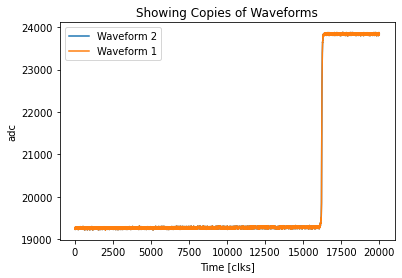

In [24]:
i = 1
j = 2
plt.plot(data[0]["waveform"]["values"].nda[i], label="Waveform 2")
plt.plot(data[0]["waveform"]["values"].nda[j], label="Waveform 1")
plt.legend()
plt.xlabel("Time [clks]")
plt.ylabel("adc")
plt.title("Showing Copies of Waveforms")
print(data[0]["timestamp"].nda[i])
print(data[0]["timestamp"].nda[j])
plt.show()

161806772310837


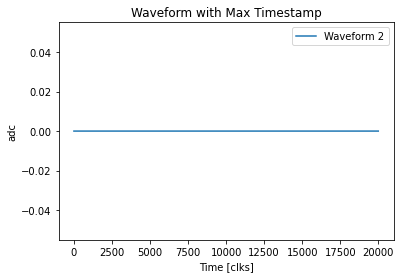

In [27]:
i = 5
plt.plot(data[0]["waveform"]["values"].nda[i], label="Waveform 2")
plt.legend()
plt.xlabel("Time [clks]")
plt.ylabel("adc")
plt.title("Waveform with Max Timestamp")
print(data[0]["timestamp"].nda[i])
plt.show()

In [18]:
df = fd.get_df(9188, "Card1")
#data = fd.get_t1_data(1330, "Card1")

In [19]:
df

,channel,timestamp,startEnergy,maxEnergy,trapEmax
0,0,34259632908387,134317535,27,6132.491699
1,0,34259633488287,134316413,4,4543.745605
2,0,34259633488287,134316413,4,4543.745605
3,0,34252175986278,134314664,4294967271,3940.395264
4,0,34252176131639,134315508,4294967250,4032.402100
...,...,...,...,...,...
8377,0,34260883511552,134313928,38,15076.475586
8378,0,34260880689449,134315145,3,4918.157715
8379,0,161806772310837,4294967295,4294967295,0.000000
8380,0,0,4294967295,4294967295,0.000000


In [20]:
df = df[df["timestamp"] > 0]
df = df[df["timestamp"] < 161806772310837]
df = df.sort_values("timestamp")

In [21]:
repeats = 0
num_copies_per_repeat = np.zeros(len(df["timestamp"]))
scanning = True
copy = False
j = 0
i = 0
while scanning:
    check = df["timestamp"].iloc[j+1] - df["timestamp"].iloc[j]
    if check == 0:
        copy = True
        repeats += 1
        copy_count = 1
    else:
        copy = False
    
    j += 1
    if j >= len(df["timestamp"]) - 1:
        scanning = False
    
    while copy:
        try:
            check = df["timestamp"].iloc[j+1] - df["timestamp"].iloc[j]
        except:
            print(j)
            copy = False
            scanning = False
            break

        if check == 0:
            copy = True
            repeats += 1
            copy_count += 1
        else:
            copy = False
            num_copies_per_repeat[i] = copy_count
            i+=1
        
        j += 1
        if j >= len(df["timestamp"]) - 1:
            scanning = False

    



6613


In [22]:
print(repeats)
print(np.mean(num_copies_per_repeat[0:100]))

3112
1.85


In [78]:
df["timestamp"].iloc[22089] - df["timestamp"].iloc[22088]

0

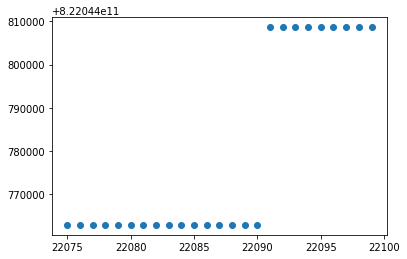

In [74]:
x = [i for i in range(0,len(df["timestamp"]))]
plt.scatter(x[22075:22100], df["timestamp"][22075:22100])
plt.show()

In [2]:
run_list = [1330, 1331, 1332, 1333]
df = fd.get_df_multiple(run_list, "Card1")

In [3]:
df["energy"] = df["trapEmax"]*0.0408625 -0.16892

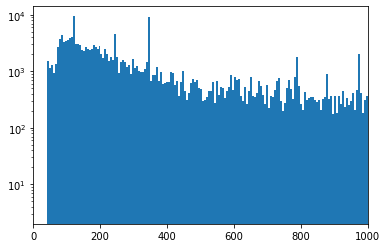

In [53]:
plt.hist(df["energy"], bins=400)
plt.yscale("log")
plt.xlim(0,1000)
plt.show()